# density plot generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy import integrate
import random

In [66]:

sz = 5.0
#result = pd.read_csv('result_Simbad_z_modified.csv')

fname = 'result_hina_' + str(sz) + '.csv'
print('bin size adjusted to' ,fname)
#result = pd.read_csv('hina/result_hina_15.0.csv')
result = pd.read_csv('result_Simbad_z_modified_rand.csv')


bin size adjusted to result_hina_5.0.csv


In [67]:
sep_all, sep_blue, sep_red = np.array([]),np.array([]),np.array([])

# set minimium projected separation
min_sep = 0.1
for i in range(len(result)): 
    if result.loc[i,'separation'] > min_sep and result.loc[i,'color'] < 0.9:
        sep_all = np.append(sep_all, result.loc[i,'separation'])
        if (result.loc[i,'color'] < 0.45):
            sep_blue = np.append(sep_blue, result.loc[i,'separation'])
        elif (result.loc[i,'color'] < 0.9):
            sep_red = np.append(sep_red, result.loc[i,'separation'])      

#len_udg = len(sep_all)
#len_udg_red = len(sep_red)
#len_udg_blue = len(sep_blue)

In [68]:
# Calculates the number of UDGs in the catalog
cat = pd.read_csv('DESI_UDGs_new_catalog.csv')
color = cat['mag_g'] - cat['mag_r']
all_udg, red_udg, blue_udg = np.array([]), np.array([]), np.array([])
for i in range(len(cat)):
    if color[i] < .45:
        blue_udg = np.append(blue_udg, color[i])
    elif color[i] < .9:
        red_udg = np.append(red_udg, color[i])
len_udg = len(cat)
len_udg_red = len(red_udg)
len_udg_blue = len(blue_udg)

In [69]:
len_udg, len_udg_red, len_udg_blue

(5760, 4166, 1537)

In [70]:
print(len(sep_red),'matches to red UDGs;', len(sep_blue), 'matches to blue UDGs;',len(sep_all),'total matches')

1003 matches to red UDGs; 407 matches to blue UDGs; 1410 total matches


[10.  9. 16. 24. 30. 33. 37. 38. 42. 40. 36. 45. 42. 60. 61. 66. 72. 58.
 80. 80. 57. 88. 82. 92. 83. 63. 66.]


array([0.10646947, 0.15792439, 0.20937931, 0.26083423, 0.31228915,
       0.36374407, 0.41519899, 0.46665391, 0.51810883, 0.56956375,
       0.62101867, 0.67247359, 0.7239285 , 0.77538342, 0.82683834,
       0.87829326, 0.92974818, 0.9812031 , 1.03265802, 1.08411294,
       1.13556786, 1.18702278, 1.2384777 , 1.28993262, 1.34138754,
       1.39284246, 1.44429738, 1.4957523 ])

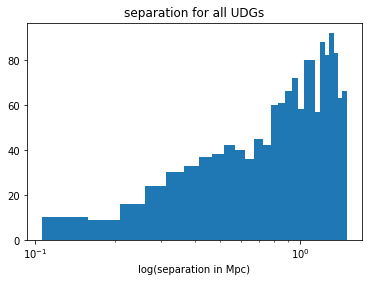

In [71]:
fig, ax = plt.subplots()

ax.set(title='separation for all UDGs', xlabel='log(separation in Mpc)')

# lets make bins be the same width regardless of which file is used (normalized to 15 bins for result_hina_1.csv
# 5 bins for sz = 1
bins = int(5*(sz-min_sep)/(1-min_sep))
hist_UDGs = plt.hist(sep_all, bins=bins, density=False)
plt.gca().set_xscale('log') # changes the scale to log

plt.show
#plt.legend;
print(hist_UDGs[0])
hist_UDGs[1] # edges of each bin (=x values), which later will be used as radius 

<function matplotlib.pyplot.show(close=None, block=None)>

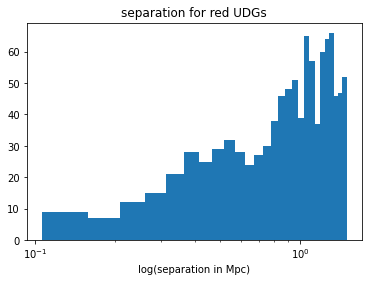

In [72]:
# Creates the histogram of red UDGs
#redhist = plt.hist(red, bins=15)#bins_list)
#plt.gca().set_xscale('log')
fig, ax = plt.subplots()
ax.set(title='separation for red UDGs', xlabel='log(separation in Mpc)')

redhist = plt.hist(sep_red, bins=bins)
plt.gca().set_xscale('log') # changes the scale to log

plt.show
#redhist[0]

In [73]:
sep_blue

array([1.24629788, 0.97212292, 0.44722502, 0.75519299, 0.99130608,
       1.34829478, 1.48343021, 0.91492237, 0.85878191, 1.28199564,
       0.27776009, 0.41654049, 0.43896793, 0.47163486, 0.76023006,
       0.71468687, 1.34326229, 1.19622335, 1.32754419, 1.38116813,
       0.65529031, 1.37013302, 0.38643244, 1.37675075, 0.58470498,
       1.03551412, 1.10735461, 1.11574404, 0.3330349 , 0.68114729,
       0.42818443, 0.92244294, 0.99630983, 1.25298208, 0.64224395,
       0.68420678, 0.71735307, 0.75044541, 1.02106442, 1.20533333,
       1.33736857, 1.19232573, 1.3195943 , 1.3488773 , 1.4642585 ,
       1.25592423, 0.55049222, 1.08989463, 1.43732176, 1.19501178,
       1.23215922, 0.80711061, 0.113116  , 0.98732491, 1.27866359,
       0.19141512, 0.34290533, 1.04759463, 1.31140856, 0.30262   ,
       1.08615655, 0.77591092, 0.58859106, 1.16445249, 0.73508498,
       1.23316841, 0.77106719, 1.44806165, 1.43918447, 1.39630075,
       1.29342762, 1.16795276, 1.39084957, 1.37202285, 0.92415

<function matplotlib.pyplot.show(close=None, block=None)>

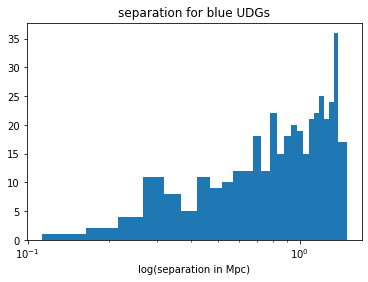

In [74]:
# Creates the histogram of blue UDGs
fig, ax = plt.subplots()
ax.set(title='separation for blue UDGs', xlabel='log(separation in Mpc)')

bluehist = plt.hist(sep_blue, bins=bins)
plt.gca().set_xscale('log') # changes the scale to log

plt.show

In [75]:
# ---Calculate/define uncertainty below---
# uncertainty = sqrt(n)
import uncertainties
from uncertainties import unumpy as unp
# XX_err are arrays of values +/- uncertainty
all_err = unp.uarray(hist_UDGs[0], np.sqrt(hist_UDGs[0]))
red_err = unp.uarray(redhist[0], np.sqrt(redhist[0]))
blue_err = unp.uarray(bluehist[0], np.sqrt(bluehist[0]))

In [76]:
# Below is used to calculate areas of annuli 
# Skip to the next cell for log scaling
area_annulus = np.array([])
# Calculates the area of annulus (= pi*(R^2-r^2))
a = np.array([])

# NEW
for i in range(0, bins):
# in case of Kpc, radius would be 100, 200, 300,..., 1500 kpc
    R = hist_UDGs[1][i+1] # R = outer radius
    r = hist_UDGs[1][i] # r = inner radius 
    # calculate area of annulus and convert to Mpc^-2
    area = np.pi*(R**2 - r**2) 
    area_annulus = np.append(area_annulus, area)
    a = np.append(a, (hist_UDGs[1][i] + hist_UDGs[1][i+1])/2.)
       
print(area_annulus)

[0.04273937 0.05937479 0.07601021 0.09264562 0.10928104 0.12591645
 0.14255187 0.15918729 0.1758227  0.19245812 0.20909354 0.22572895
 0.24236437 0.25899978 0.2756352  0.29227062 0.30890603 0.32554145
 0.34217687 0.35881228 0.3754477  0.39208311 0.40871853 0.42535395
 0.44198936 0.45862478 0.4752602 ]


In [77]:
### Calculates density of UDGs ###
UDGs_hist = np.array([])
density_red = np.array([])
density_blue = np.array([])

for i in range(0,bins):
    density_UDGs = all_err[i]/area_annulus[i]
    density_r = red_err[i]/area_annulus[i]
    density_b = blue_err[i]/area_annulus[i]
    
# Appends density of UDGs to existing arrays     
    UDGs_hist = np.append(UDGs_hist, density_UDGs)
    density_red = np.append(density_red, density_r)
    density_blue = np.append(density_blue, density_b)

print(UDGs_hist)

[233.97629107562054+/-73.9897998277489
 151.57948517885862+/-50.52649505961955
 210.49804929840255+/-52.62451232460064
 259.05163709385556+/-52.87869399271579
 274.52155044590216+/-50.12054856683767
 262.0785360125222+/-45.6220172253608
 259.55464395535785+/-42.67052061666341
 238.7125302021563+/-38.72428589111387
 238.8770009913935+/-36.85952148186997
 207.83742539544883+/-32.86198236374701
 172.17175039400453+/-28.69529173233409
 199.35413537788853+/-29.717959886710297
 173.29280023164748+/-26.739659600054782
 231.66042468290075+/-29.907232225740408
 221.3070025289661+/-28.335458111110338
 225.81811593278658+/-27.796288580310517
 233.08058868572925+/-27.468810803771934
 178.16471650879998+/-23.39417338623425
 233.7972203606735+/-26.139323883848192
 222.9578085700297+/-24.92744080384858
 151.81874951892067+/-20.108884614696347
 224.4422083839085+/-23.925619803942247
 200.6270670695181+/-22.155553188407474
 216.29045819142485+/-22.549839077960584
 187.78732472229734+/-20.61233673358665

In [78]:
# ---Normalize the densities by diving by the length-- #
x_prime = a
y_prime = unp.log10(UDGs_hist/len_udg)
y_r = unp.log10(density_red/len_udg_red)
y_b = unp.log10(density_blue/len_udg_blue)
y_prime_lin = (UDGs_hist/len_udg)
y_r_lin = (density_red/len_udg_red)
y_b_lin = (density_blue/len_udg_blue)


In [79]:
# Creates separate arrays for values and uncertainties for the plotting
y_prime_val, y_prime_err = [],[]
y_r_val, y_r_err = [], []
y_b_val, y_b_err = [], []
y_prime_lin_val, y_prime_lin_err = [], []
y_r_lin_val, y_r_lin_err = [], []
y_b_lin_val, y_b_lin_err = [], []
for i in range(len(y_prime)):
# Separates y_prime_lin
    y_prime_val.append(y_prime[i].n) # Value
    y_prime_err.append(y_prime[i].s) # Uncertainty
# Separates y_r 
    y_r_val.append(y_r[i].n)
    y_r_err.append(y_r[i].s) 
# Separates y_b
    y_b_val.append(y_b[i].n)
    y_b_err.append(y_b[i].s)
# Separates y_prime_lin
    y_prime_lin_val.append(y_prime_lin[i].n)
    y_prime_lin_err.append(y_prime_lin[i].s)
# Separates y_r_lin
    y_r_lin_val.append(y_r_lin[i].n)
    y_r_lin_err.append(y_r_lin[i].s)
# Separates y_b_lin
    y_b_lin_val.append(y_b_lin[i].n)
    y_b_lin_err.append(y_b_lin[i].s)

In [80]:

def power_all(x, a, k, b):
    return a*(x**k) + b
def power_red(x, a, k, b):
    return a*(x**k) + b
def power_blue(x, a, k, b):
    return a*(x**k) + b

all_back  =  0.14
red_back  =  0.14
blue_back =  0.14
def power_all_fixed(x, a, k):
    return a*(x**k) + all_back
def power_red_fixed(x, a, k):
    return a*(x**k) + red_back
def power_blue_fixed(x, a, k):
    return a*(x**k) + blue_back

all UDGs constants:  [ 3.33676472e-02 -1.74031717e-01  9.45181896e-15]
a = 0.033367647217194984 +/- 0.24271061685318596 
k = -0.17403171652717758 +/- 1.1622413657903439 
b = 9.451818956041244e-15 +/- 0.24215047871874884
red UDGs constants:  [ 3.24278734e-02 -1.98930249e-01  1.69001739e-13]
a = 0.032427873441295794 +/- 0.2130098030614459 
k = -0.1989302487749069 +/- 1.1875515138371704 
b = 1.6900173916321503e-13 +/- 0.21239714514944655
blue UDGs constants:  [ 3.51672979e-02 -4.15624042e-02  1.60775477e-10]
a = 0.0351672978842551 +/- 6.050584797117263 
k = -0.04156240424163334 +/- 6.993933480981416 
b = 1.6077547658086596e-10 +/- 6.049651794668148


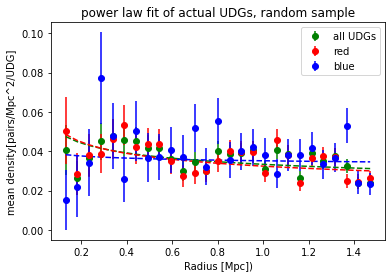

In [91]:
fig, ax = plt.subplots()
plt.title('power law fit of actual UDGs, random sample')
plt.xlabel('Radius [Mpc])')
plt.ylabel('mean density[pairs/Mpc^2/UDG]')
#plt.xlim(0,6.0)
#plt.ylim(0.2,1.6)

arr1 = plt.errorbar(x_prime, y_prime_lin_val, yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])

plt.plot(x_prime, power_all(x_prime, *popt_power_all), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5, "\nb =", popt_power_all[2], "+/-", pcov_power_all[2,2]**0.5)

arr2 = plt.errorbar(x_prime, y_r_lin_val, yerr=y_r_lin_err, label='red', color='r',fmt='o')
popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_all, x_prime, y_r_lin_val, sigma=y_r_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)],maxfev=1000000)

plt.plot(x_prime, power_red(x_prime, *popt_power_red), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5, "\nb =", popt_power_red[2], "+/-", pcov_power_red[2,2]**0.5)

arr3 = plt.errorbar(x_prime, y_b_lin_val, yerr=y_b_lin_err, label='blue', color='b',fmt='o')
popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_all, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=[1,-1.0,0.5], bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)] ,maxfev=1000000)
plt.plot(x_prime, power_blue(x_prime, *popt_power_blue), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5, "\nb =", popt_power_blue[2], "+/-", pcov_power_blue[2,2]**0.5)
#print(x_prime)
ax.legend()
plt.show()

In [86]:
# Defines power law function for fitting
def power_no_back(x, a, k):
    return 2*np.pi*a*(x**k)*x 

# Defines function for fitting for background
def background(x, b):
    return 2*np.pi*b*x

r_out = 0.2  # units Mpc

N1_all = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_all[0], popt_power_all[1])) #integrate from o to 0.2 Mpc
N2_all = scipy.integrate.quad(background,0,r_out,args=(popt_power_all[2]))
print("N1 =", N1_all[0], ", N2 =", N2_all[0],  ", N1/N2 =", N1_all[0]/N2_all[0])
print("N1 * len_udg", N1_all[0] * len_udg)

N1_red = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_red[0], popt_power_red[1]))
N2_red = scipy.integrate.quad(background,0,r_out,args=(popt_power_red[2]))
print("N1 =", N1_red[0],", N2 =", N2_red[0], ", N1/N2 =", N1_red[0]/N2_red[0])

N1_blue = scipy.integrate.quad(power_no_back,0,r_out,args=(popt_power_blue[0], popt_power_blue[1]))
N2_blue = scipy.integrate.quad(background,0,r_out,args=(popt_power_blue[2]))
print("N1 =", N1_blue[0], ", N2 =", N2_blue[0], ", N1/N2 =", N1_blue[0]/N2_blue[0])


N1 = 0.006077362839027432 , N2 = 1.1877505998143971e-15 , N1/N2 = 5116699448501.315
N1 * len_udg 35.00560995279801
N1 = 0.006232669169418533 , N2 = 2.1237384887962194e-14 , N1/N2 = 293476301451.378
N1 = 0.0048252520124839075 , N2 = 2.0203642244153855e-11 , N1/N2 = 238830798.6338526


all UDGs constants:  [ 3.33676472e-02 -1.74031717e-01  9.45181896e-15]
a = 0.033367647217194984 +/- 0.24271061685318596 
k = -0.17403171652717758 +/- 1.1622413657903439 
b = 9.451818956041244e-15 +/- 0.24215047871874884
red UDGs constants:  [ 3.15738215e-02 -1.42273219e-01  4.17717865e-18]
a = 0.031573821489489604 +/- 0.3312098653406977 
k = -0.1422732185582985 +/- 1.3595788713118495 
b = 4.1771786515484985e-18 +/- 0.33090042551925536
blue UDGs constants:  [ 3.51672979e-02 -4.15624042e-02  1.60775477e-10]
a = 0.0351672978842551 +/- 6.050584797117263 
k = -0.04156240424163334 +/- 6.993933480981416 
b = 1.6077547658086596e-10 +/- 6.049651794668148


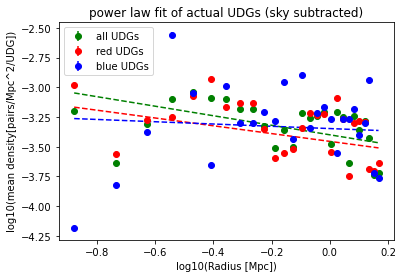

In [87]:
fig, ax = plt.subplots()
plt.title('power law fit of actual UDGs (sky subtracted)')
plt.xlabel('log10(Radius [Mpc])')
plt.ylabel('log10(mean density[pairs/Mpc^2/UDG])')

#plt.xlim(-0.8,0.8)
#plt.ylim(-2.2,0.5)

xp_log = np.log10(x_prime)

p0 = [1,-1,0.5]
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=p0, bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])
plt.errorbar(xp_log,np.log(y_prime_lin_val-popt_power_all[2]), yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
plt.plot(xp_log, np.log(power_all(x_prime, *popt_power_all)-popt_power_all[2]), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5, "\nb =", popt_power_all[2], "+/-", pcov_power_all[2,2]**0.5)

popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_red, x_prime, y_r_lin_val, sigma=y_r_lin_val ,p0=p0,bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)])
plt.errorbar(xp_log, np.log(y_r_lin_val-popt_power_red[2]), yerr=y_r_lin_err,label='red UDGs', color='r', fmt='o')
plt.plot(xp_log, np.log(power_red(x_prime, *popt_power_red)-popt_power_red[2]), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5, "\nb =", popt_power_red[2], "+/-", pcov_power_red[2,2]**0.5)

popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_blue, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=p0, bounds=[(-np.inf,-np.inf,0), (np.inf,np.inf,np.inf)],maxfev=1000000)
plt.errorbar(xp_log, np.log(y_b_lin_val-popt_power_blue[2]), yerr=y_b_lin_err ,label='blue UDGs', color='b',fmt='o')
plt.plot(xp_log, np.log(power_blue(x_prime, *popt_power_blue)-popt_power_blue[2]), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5, "\nb =", popt_power_blue[2], "+/-", pcov_power_blue[2,2]**0.5)

ax.legend()
#fname = fname + '.pdf'
#plt.savefig(fname)
plt.show()



all UDGs constants:  [-0.10654775  0.06960859]
a = -0.10654775211358303 +/- 0.0011593377368733597 
k = 0.06960858819478825 +/- 0.02532896417994638
red UDGs constants:  [-0.10847818  0.05048071]
a = -0.10847817737756343 +/- 0.0014707883057558618 
k = 0.050480710441597174 +/- 0.021045015817505956
blue UDGs constants:  [-0.10485491  0.01841134]
a = -0.10485490675021183 +/- 0.0019195486126596987 
k = 0.01841134498955321 +/- 0.03671342434590905


<ipython-input-89-5397eb14b66f>:15: RuntimeWarning: invalid value encountered in log
  plt.errorbar(xp_log,np.log(newy), yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
/data0/sw/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-89-5397eb14b66f>:16: RuntimeWarning: invalid value encountered in log
  plt.plot(xp_log, np.log(power_all_fixed(x_prime, *popt_power_all)-all_back), color='g',linestyle='dashed')
<ipython-input-89-5397eb14b66f>:22: RuntimeWarning: invalid value encountered in log
  plt.errorbar(xp_log, np.log(newy), yerr=y_r_lin_err,label='red UDGs', color='r', fmt='o')
/data0/sw/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-89-5397eb14b66f>:23: RuntimeWarning: invalid value encountered in 

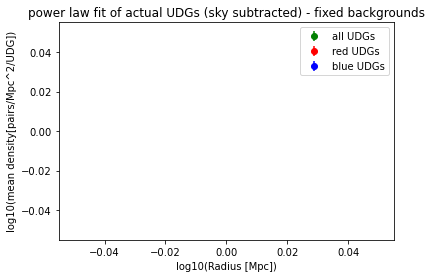

In [89]:
ig, ax = plt.subplots()
plt.title('power law fit of actual UDGs (sky subtracted) - fixed backgrounds')
plt.xlabel('log10(Radius [Mpc])')
plt.ylabel('log10(mean density[pairs/Mpc^2/UDG])')

#plt.xlim(-0.8,0.8)
#plt.ylim(-2.2,0.5)

newy = []
xp_log = np.log10(x_prime)

p0 = [1,-1]
popt_power_all, pcov_power_all = scipy.optimize.curve_fit(power_all_fixed, x_prime, y_prime_lin_val, sigma=y_prime_lin_err, p0=p0, bounds=[(-np.inf,-np.inf), (np.inf,np.inf)],maxfev=1000000)
newy[:] = [i - all_back for i in y_prime_lin_val]
plt.errorbar(xp_log,np.log(newy), yerr=y_prime_lin_err, label='all UDGs', color='g',fmt='o')
plt.plot(xp_log, np.log(power_all_fixed(x_prime, *popt_power_all)-all_back), color='g',linestyle='dashed')
print('all UDGs constants: ', popt_power_all)
print("a =", popt_power_all[0], "+/-", pcov_power_all[0,0]**0.5, "\nk =", popt_power_all[1], "+/-", pcov_power_all[1,1]**0.5)
     
popt_power_red, pcov_power_red = scipy.optimize.curve_fit(power_red_fixed, x_prime, y_r_lin_val, sigma=y_r_lin_val ,p0=p0,bounds=[(-np.inf,-np.inf), (np.inf,np.inf)])
newy[:] = [i - red_back for i in y_r_lin_val]
plt.errorbar(xp_log, np.log(newy), yerr=y_r_lin_err,label='red UDGs', color='r', fmt='o')
plt.plot(xp_log, np.log(power_red_fixed(x_prime, *popt_power_red)-red_back), color='r',linestyle='dashed')
print('red UDGs constants: ', popt_power_red)
print("a =", popt_power_red[0], "+/-", pcov_power_red[0,0]**0.5, "\nk =", popt_power_red[1], "+/-", pcov_power_red[1,1]**0.5)

popt_power_blue, pcov_power_blue = scipy.optimize.curve_fit(power_blue_fixed, x_prime, y_b_lin_val, sigma=y_b_lin_err, p0=p0, bounds=[(-np.inf,-np.inf), (np.inf,np.inf)])
newy[:] = [i - blue_back for i in y_b_lin_val]
plt.errorbar(xp_log, np.log(newy), yerr=y_b_lin_err ,label='blue UDGs', color='b',fmt='o')
plt.plot(xp_log, np.log(power_blue_fixed(x_prime, *popt_power_blue)-blue_back), color='b',linestyle='dashed')
print('blue UDGs constants: ', popt_power_blue)
print("a =", popt_power_blue[0], "+/-", pcov_power_blue[0,0]**0.5, "\nk =", popt_power_blue[1], "+/-", pcov_power_blue[1,1]**0.5)

ax.legend()
#fname = fname + '.pdf'
#plt.savefig(fname)
plt.show()

